# Credit Card Approval Using Machine Learning

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pycaret
import numpy as np
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import pycaret

from pycaret.classification import *

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 100

In [8]:
cca =  pd.read_csv('credit_card_approval.csv')
cca.DAYS_EMPLOYED = abs(cca.DAYS_EMPLOYED)
cca.DAYS_BIRTH = abs(cca.DAYS_BIRTH)
cca_relevant_attribute = cca.drop(["BEGIN_MONTHS"], axis=1)
cca_relevant_attribute.sample(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,STATUS,TARGET
75413,5149239,M,N,N,No children,225000.0,Higher education,Married,With parents,9412,959,1,0,1,0,IT staff,0,0
155,5113181,M,Y,Y,No children,135000.0,Higher education,Civil marriage,House / apartment,17538,613,1,0,0,0,Core staff,C,0
360533,5045615,M,Y,Y,1 children,360000.0,Higher education,Married,House / apartment,15556,1327,1,0,0,0,Drivers,C,0
305945,5146138,F,N,Y,No children,135000.0,Secondary / secondary special,Married,House / apartment,10170,2196,1,1,1,0,Cooking staff,X,0
247067,5009608,F,N,N,2+ children,144000.0,Secondary / secondary special,Married,House / apartment,12277,982,1,1,1,0,High skill tech staff,X,0
217451,5066483,F,N,Y,No children,180000.0,Higher education,Married,With parents,9624,2775,1,0,0,0,Laborers,C,0
530766,5062604,F,Y,Y,No children,360000.0,Secondary / secondary special,Married,House / apartment,18356,1820,1,0,0,0,High skill tech staff,X,0
389728,5009178,M,Y,N,No children,229500.0,Incomplete higher,Married,Co-op apartment,18325,1256,1,0,0,0,Laborers,0,0
317761,5024945,M,Y,Y,No children,180000.0,Secondary / secondary special,Married,House / apartment,15623,1645,1,0,0,0,Laborers,C,0
48511,5045534,M,Y,N,2+ children,225000.0,Higher education,Married,With parents,10937,1539,1,0,0,0,High skill tech staff,C,0


In [3]:
cca.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN            object
AMT_INCOME_TOTAL       float64
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
JOB                     object
BEGIN_MONTHS             int64
STATUS                  object
TARGET                   int64
dtype: object

In [4]:
#columns = []
#for n in cca.columns:
#    columns.append(n)

In [5]:
#for n in columns:  
#    print(n)
#    print(cca[n].unique())
#    for i in cca[n].isna():
#        if i == True:
#            print("AHAAAA")
#    print('\n \n')

In [6]:
#cca.isnull().sum()

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

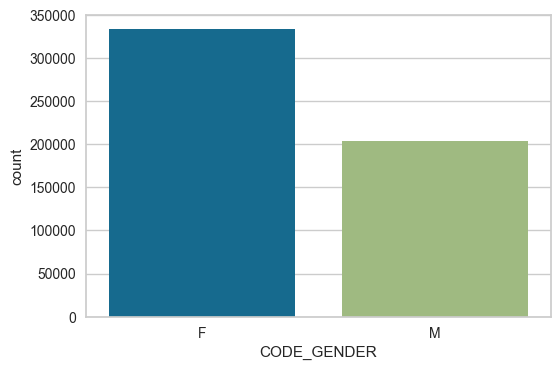

In [7]:
sns.countplot(x='CODE_GENDER',data=cca)

In [8]:
# --- Setting Up PyCaret ---
stp = setup(data = cca, target = 'TARGET', train_size = 0.7)
best_model = compare_models()
best_model

,Description,Value
0,Session id,3720
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(537667, 19)"
4,Transformed data shape,"(537667, 29)"
5,Transformed train set shape,"(376366, 29)"
6,Transformed test set shape,"(161301, 29)"
7,Ordinal features,3
8,Numeric features,9
9,Categorical features,9


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,8.2520
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,8.2710
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,15.9000
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,9.0920
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,9.0560
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,21.7970
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,16.4090
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,15.5730
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,9.6200
knn,K Neighbors Classifier,0.9974,0.9198,0.4596,0.7289,0.5631,0.5619,0.5773,74.8760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=3720, splitter='best')